In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble
from sklearn import preprocessing
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import pipeline
from sklearn.decomposition import PCA

In [3]:
# Read data from the files
dr = pd.read_csv('train.csv')
# Lets see how many features we have
print(dr.columns)
print("#of features is: ",len(dr.columns))

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

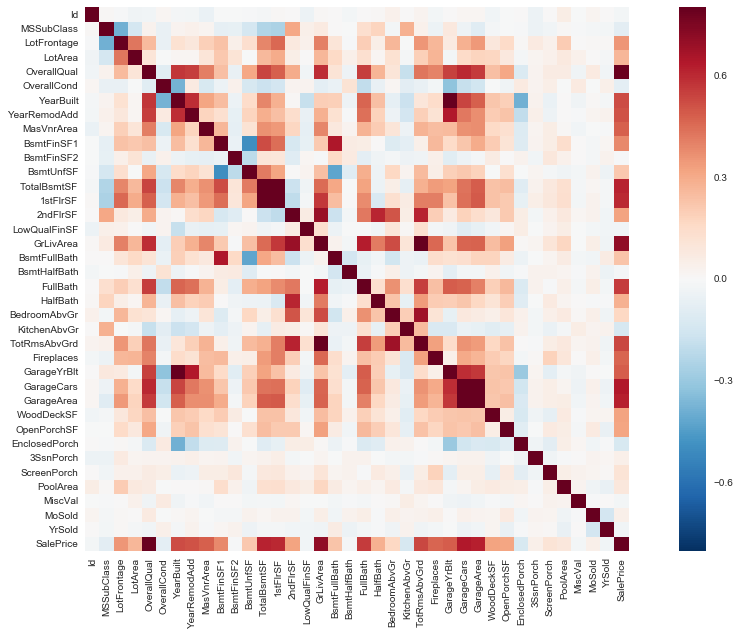

In [4]:
%matplotlib inline
# Find correlation matrix for numeric fields and plot it in an attractive way
matcor = dr.corr()
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(matcor, vmax=.8, square=True)
plt.show()
# We can see some correlations between GarageArea & GarageCars & GarageYrBlt as well as between 1stFlrSF & TotalBsmtSF
# as well as between GarageYrBld & YearBuilt as well as between OverallQual & SalePrice

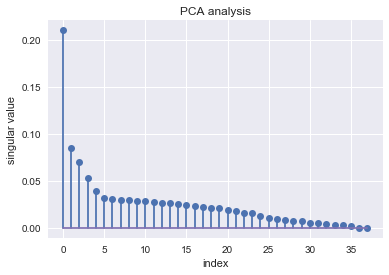

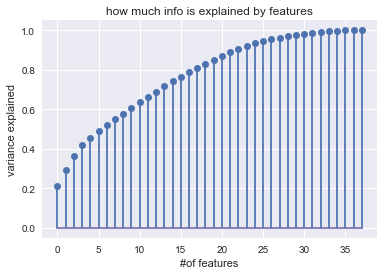

In [5]:
# Let`s look at the importance of the numerical features
U,S,V = np.linalg.svd(matcor)
sig_val = S/S.sum()
plt.stem(sig_val)
plt.xlabel('index')
plt.ylabel('singular value')
plt.title('PCA analysis')
plt.show()

# How many features explains how much data...
plt.stem(sig_val.cumsum())
plt.xlabel('#of features')
plt.ylabel('variance explained')
plt.title('how much info is explained by features')
plt.show()

# It can be seen that 16 feature explain 80% of our data 

In [6]:
# Split numerical data from categorical data
numerical_data = dr[dr.select_dtypes(include=[np.number]).columns.values]


In [7]:
# Use the test data
dr2 = pd.read_csv('test.csv')
dr2 = dr2[dr2.select_dtypes(include=[np.number]).columns[1:].values]
print(dr2.columns.values)

['MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea'
 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr'
 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt' 'GarageCars'
 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch'
 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold']


In [8]:
# We got an error. Why? Let`s see...
# Find if the SalePrice column is in dr2
print("the column is in: " ,set(list(dr2.columns.values)).intersection(['SalePrice']))
print(len(dr2.columns.values),len(dr.columns.values),len(set(list(dr.columns.values)).intersection(list(dr2.columns.values))))

the column is in:  set()
36 81 36


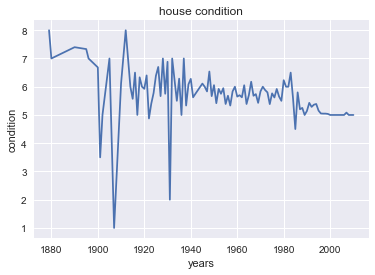

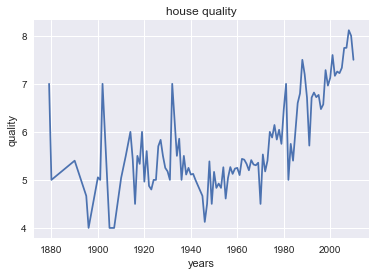

In [9]:
# What are the best predictors for the price?
# What is the Overall condition by year of construction?
ana = dr2.groupby('YearBuilt')['OverallCond'].mean()

plt.figure(1)
plt.plot(ana)
plt.xlabel('years')
plt.ylabel('condition')
plt.title('house condition')

plt.figure(2)
plt.plot(dr2.groupby('YearBuilt')['OverallQual'].mean())
plt.xlabel('years')
plt.ylabel('quality')
plt.title('house quality')
plt.show()

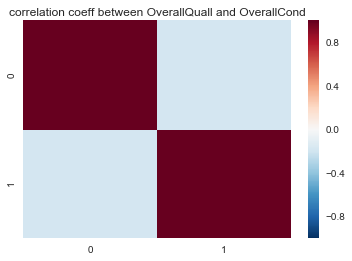

In [52]:
# There is a correlation between condition and quality?
sns.heatmap(np.corrcoef(dr2.groupby('YearBuilt')['OverallQual'].mean(),dr2.groupby('YearBuilt')['OverallCond'].mean()))
plt.title('correlation coeff between OverallQuall and OverallCond')
plt.show()

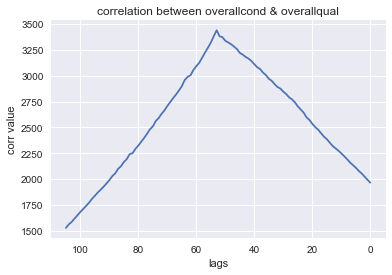

In [10]:
# Correlation between overall condition and overall quality
plt.gca().invert_xaxis()
ana = np.correlate(dr2.groupby('YearBuilt')['OverallCond'].mean(),dr2.groupby('YearBuilt')['OverallQual'].mean(),mode='same')
plt.plot(ana)
plt.xlabel('lags')
plt.ylabel('corr value')
plt.title('correlation between overallcond & overallqual')
plt.show()

In [11]:
# We would predict SalePrice and we get rid of Id because it is useless
lista = list(set(numerical_data.columns.values).difference({'SalePrice','Id'}))

# Here we have the numerical values, and we drop NaN values
numerical_data = numerical_data.dropna()

X = numerical_data[lista]
Y = numerical_data['SalePrice']

# Scale the data
sc = preprocessing.MinMaxScaler()
X_min_max = sc.fit_transform(X)
Y_min_max = sc.fit_transform(Y)


# Lets print the scales we used
print(sc.scale_)

# Really Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X_min_max,Y_min_max,test_size=0.33,random_state=1)


1.38948907097e-06


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [12]:
# Implement the SVM algorithm
clf = svm.SVR(kernel='rbf',degree=3,gamma='auto',coef0=0.0,tol=1e-3,C=1.0,epsilon=0.001,shrinking=True,cache_size=200,verbose=False,max_iter=-1)
clf.fit(X_train,Y_train)

# Lets implement the rough formula for the score (1-u/v) where u=((y_true - y_pred) ** 2).sum() & v=((y_true - y_true.mean()) ** 2).sum()
print('The accuracy score is',(1-(((Y_test - clf.predict(X_test))**2).sum())/((Y_test-np.mean(Y_test))**2).sum()))

The accuracy score is 0.879492612227


In [13]:
# Implement the regression tree adaboost
clf2 = ensemble.AdaBoostRegressor(tree.DecisionTreeRegressor(max_depth=6),n_estimators=1000, random_state=1)
clf2.fit(X_train,Y_train)

# Lets implement the rough formula for the score (1-u/v) where u=((y_true - y_pred) ** 2).sum() & v=((y_true - y_true.mean()) ** 2).sum()
print('The accuracy score is',(1-(((Y_test - clf2.predict(X_test))**2).sum())/((Y_test-np.mean(Y_test))**2).sum()))

The accuracy score is 0.863200990351


In [14]:
# Implement only one regression tree
clf3 = tree.DecisionTreeRegressor(max_depth=6)
clf3.fit(X_train,Y_train)

# Lets implement the rough formula for the score (1-u/v) where u=((y_true - y_pred) ** 2).sum() & v=((y_true - y_true.mean()) ** 2).sum()
print('The accuracy score is',(1-(((Y_test - clf3.predict(X_test))**2).sum())/((Y_test-np.mean(Y_test))**2).sum()))

The accuracy score is 0.799454304546


In [15]:
# We can see the best score is obtained by SVM
